In [1]:
!pip install numpy pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset from the specified location
df = pd.read_csv(r"C:\Users\AYUSH\ayush cv\Chocolate Sales.csv")  # Use raw string notation

# View the first 5 rows of the dataset
print(df.head())
print(df.tail())

     Sales Person    Country              Product       Date    Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco  04-Jan-22   $5,320    
1     Van Tuxwell      India        85% Dark Bars  01-Aug-22   $7,896    
2    Gigi Bohling      India  Peanut Butter Cubes  07-Jul-22   $4,501    
3    Jan Morforth  Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24-Feb-22  $13,685    

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  
          Sales Person    Country              Product       Date   Amount  \
1089  Karlen McCaffrey  Australia  Spicy Special Slims  17-May-22  $4,410    
1090    Jehu Rudeforth        USA           White Choc  07-Jun-22  $6,559    
1091      Ches Bonnell     Canada  Organic Choco Syrup  26-Jul-22    $574    
1092    Dotty Strutley      India              Eclairs  28-Jul-22  $2,086    
1093  Karlen McCaffrey      India       70% Dark Bi

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [10]:
# Step 1: Check for missing values
print(df.isnull().sum())

# Step 2: Convert the 'DATE' column to datetime format with a specified format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Step 3: Remove any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Step 4: Convert 'AMOUNT' to numeric, removing any dollar signs and commas
df['Amount'] = df['Amount'].replace({'$': '', ',': ''}, regex=True).astype(float)

# Step 5: Display the cleaned dataset
print(df.info())

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   float64       
 5   Boxes Shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 51.4+ KB
None


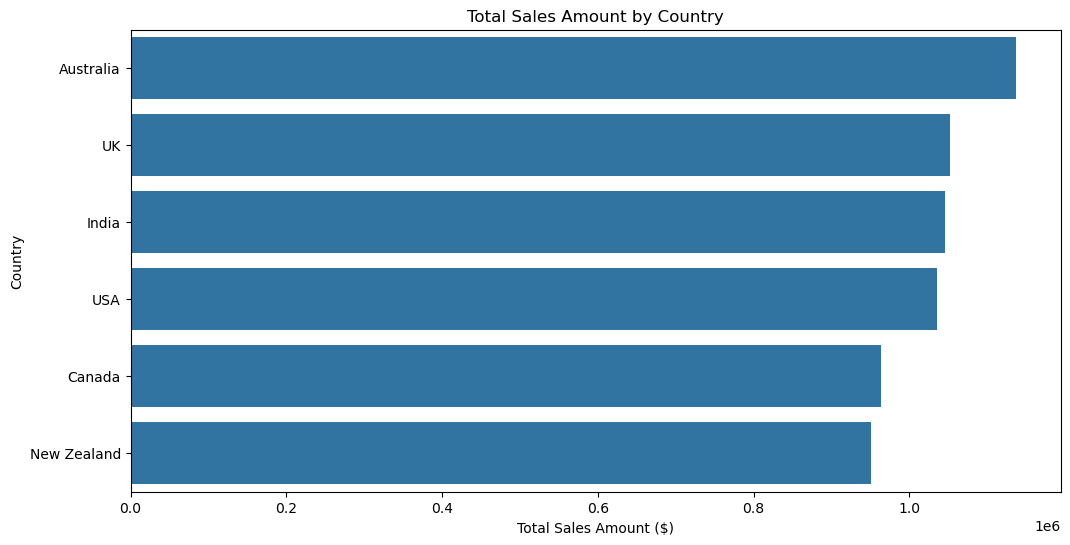

In [13]:
# Step 3: Visualize total sales by country without using palette
plt.figure(figsize=(12, 6))
sns.barplot(x='Amount', y='Country', data=total_sales_by_country)
plt.title('Total Sales Amount by Country')
plt.xlabel('Total Sales Amount ($)')
plt.ylabel('Country')
plt.show()

In [15]:
total_sales_by_country = df.groupby('Country')['Amount'].sum().reset_index()


In [16]:
total_sales_by_country = total_sales_by_country.sort_values(by='Amount', ascending=False)

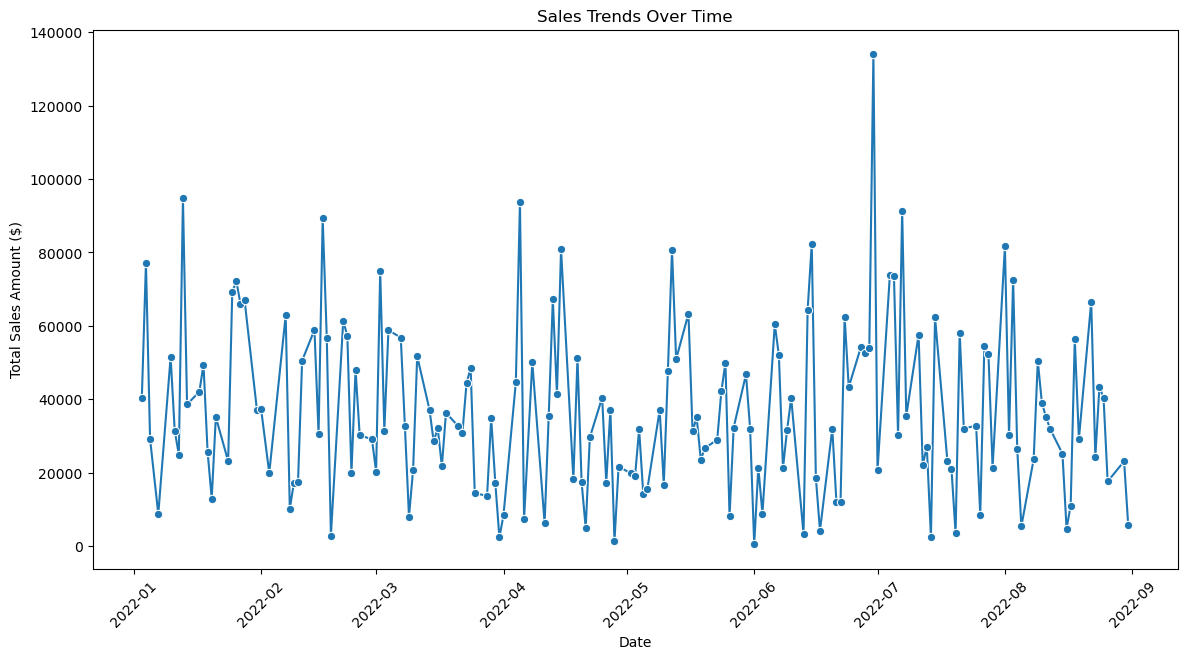

In [20]:
sales_trends = df.groupby('Date')['Amount'].sum().reset_index()

# Visualize sales trends over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Amount', data=sales_trends, marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount ($)')
plt.xticks(rotation=45)
plt.show()

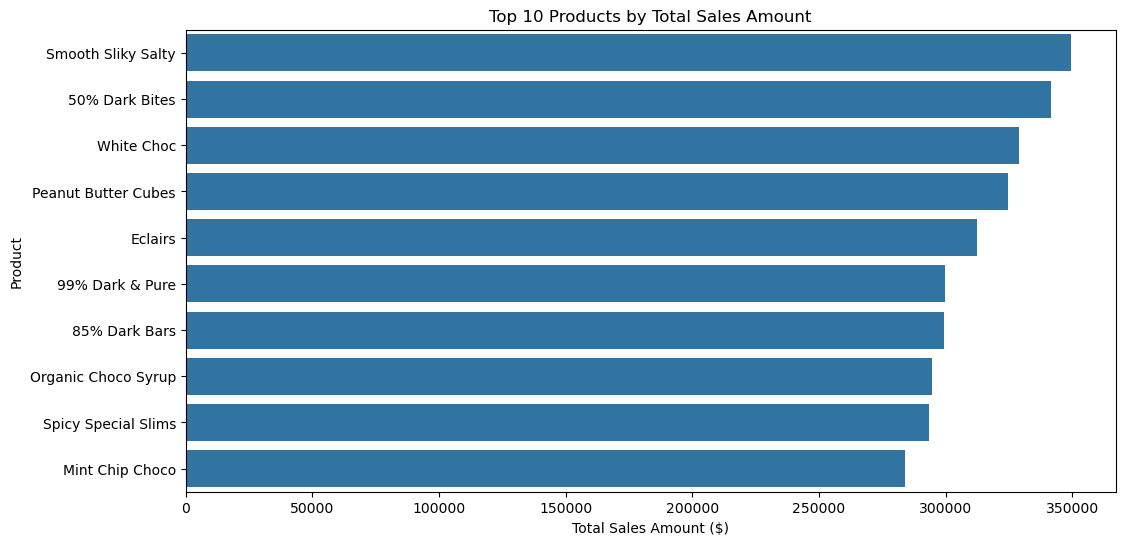

In [22]:
# Group by product and calculate total sales
top_products = df.groupby('Product')['Amount'].sum().reset_index()

# Sort the results
top_products = top_products.sort_values(by='Amount', ascending=False)

# Visualize top products by sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Amount', y='Product', data=top_products.head(10))  # Removed palette parameter
plt.title('Top 10 Products by Total Sales Amount')
plt.xlabel('Total Sales Amount ($)')
plt.ylabel('Product')
plt.show()

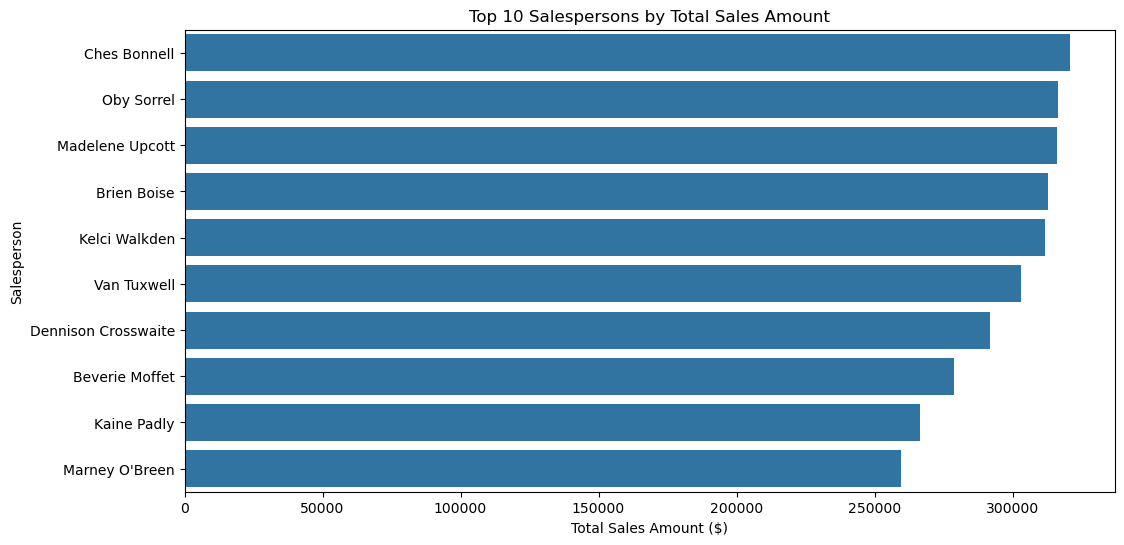

In [24]:
# Group by salesperson and calculate total sales
sales_by_person = df.groupby('Sales Person')['Amount'].sum().reset_index()

# Sort the results
sales_by_person = sales_by_person.sort_values(by='Amount', ascending=False)

# Visualize sales by salesperson
plt.figure(figsize=(12, 6))
sns.barplot(x='Amount', y='Sales Person', data=sales_by_person.head(10))  # Removed palette parameter
plt.title('Top 10 Salespersons by Total Sales Amount')
plt.xlabel('Total Sales Amount ($)')
plt.ylabel('Salesperson')
plt.show()

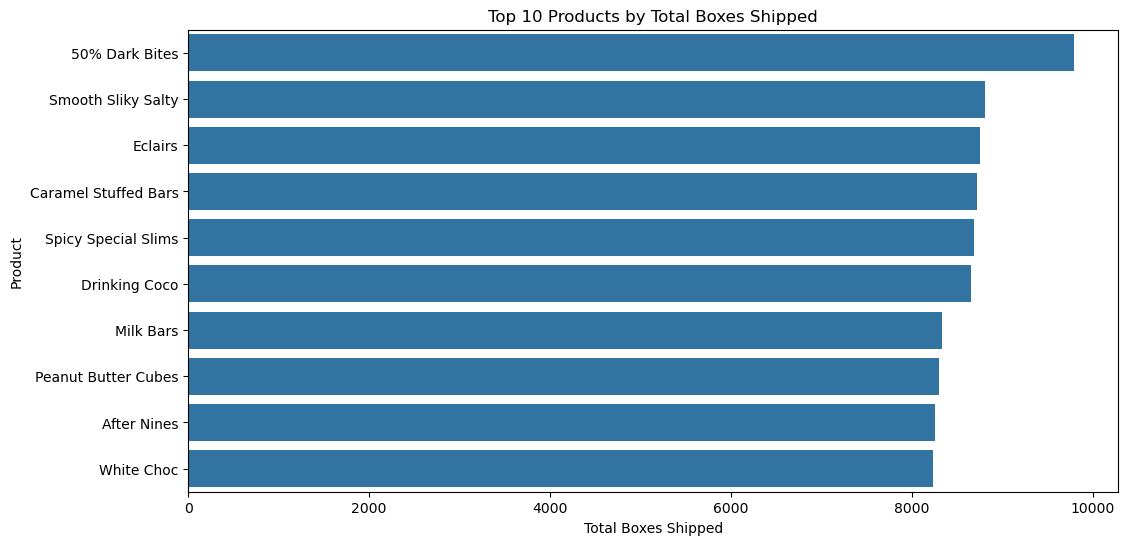

In [28]:
# Group by product and calculate total boxes shipped
boxes_shipped_by_product = df.groupby('Product')['Boxes Shipped'].sum().reset_index()

# Sort the results
boxes_shipped_by_product = boxes_shipped_by_product.sort_values(by='Boxes Shipped', ascending=False)

# Visualize boxes shipped by product
plt.figure(figsize=(12, 6))
sns.barplot(x='Boxes Shipped', y='Product', data=boxes_shipped_by_product.head(10))  # Removed palette parameter
plt.title('Top 10 Products by Total Boxes Shipped')
plt.xlabel('Total Boxes Shipped')
plt.ylabel('Product')
plt.show()

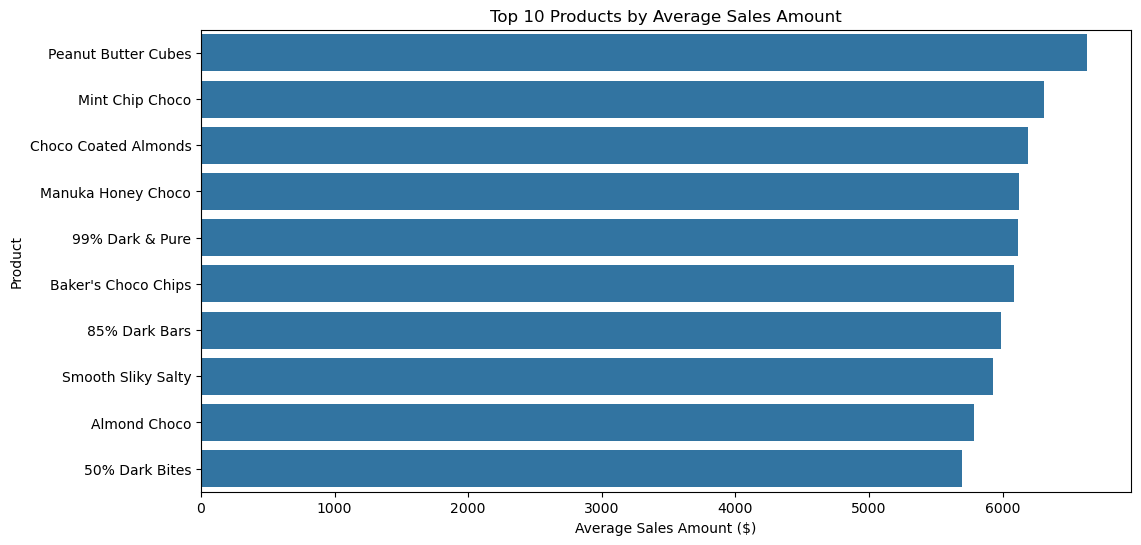

In [29]:
# Calculate average sales amount per product
average_sales_per_product = df.groupby('Product')['Amount'].mean().reset_index()

# Sort the results
average_sales_per_product = average_sales_per_product.sort_values(by='Amount', ascending=False)

# Visualize average sales amount per product
plt.figure(figsize=(12, 6))
sns.barplot(x='Amount', y='Product', data=average_sales_per_product.head(10))
plt.title('Top 10 Products by Average Sales Amount')
plt.xlabel('Average Sales Amount ($)')
plt.ylabel('Product')
plt.show()

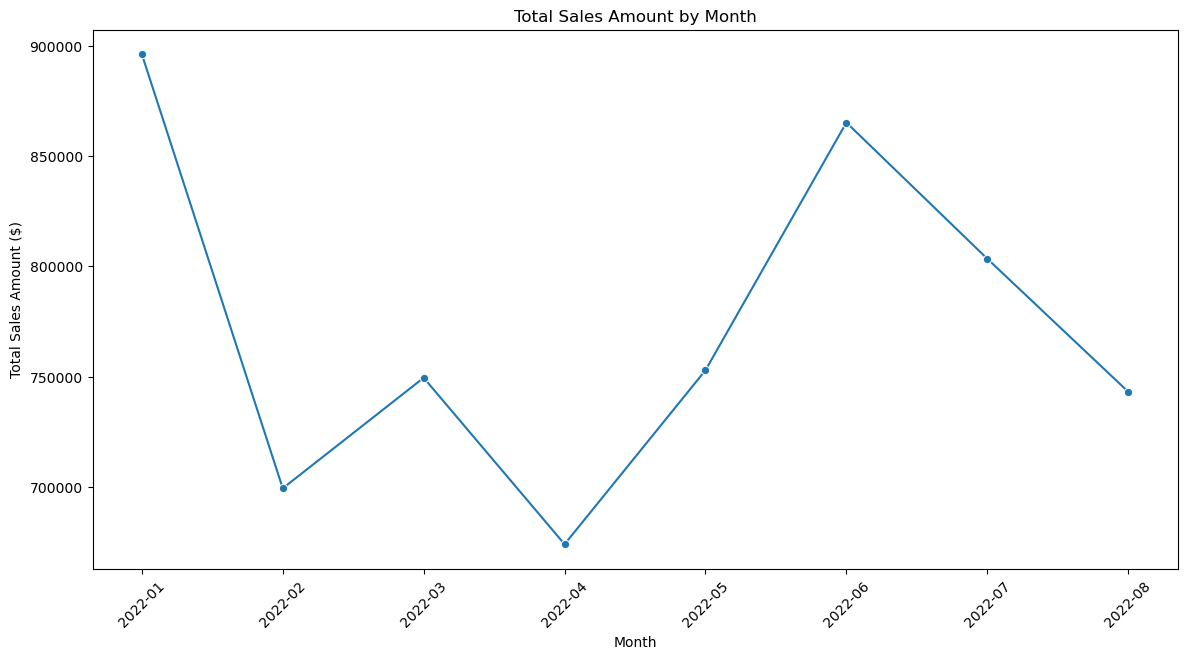

In [31]:
# Extract month and year from the date and convert to string
df['Month'] = df['Date'].dt.to_period('M').astype(str)

# Group by month and calculate total sales
monthly_sales = df.groupby('Month')['Amount'].sum().reset_index()

# Visualize total sales by month
plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='Amount', data=monthly_sales, marker='o')
plt.title('Total Sales Amount by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount ($)')
plt.xticks(rotation=45)
plt.show()

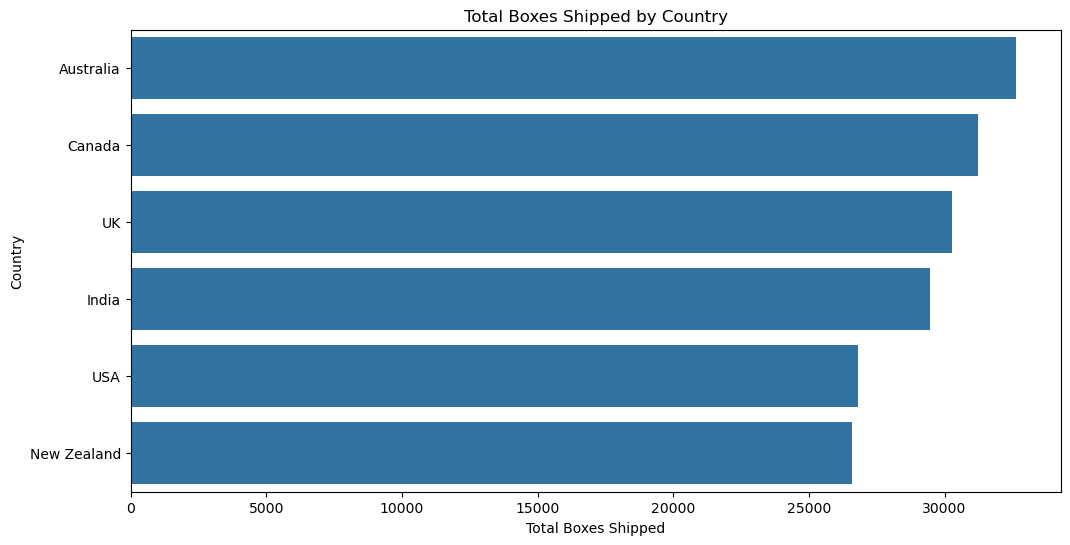

In [32]:
# Group by country and calculate total boxes shipped
boxes_shipped_by_country = df.groupby('Country')['Boxes Shipped'].sum().reset_index()

# Sort the results
boxes_shipped_by_country = boxes_shipped_by_country.sort_values(by='Boxes Shipped', ascending=False)

# Visualize boxes shipped by country
plt.figure(figsize=(12, 6))
sns.barplot(x='Boxes Shipped', y='Country', data=boxes_shipped_by_country)
plt.title('Total Boxes Shipped by Country')
plt.xlabel('Total Boxes Shipped')
plt.ylabel('Country')
plt.show()

Conclusion
The expanded analysis of the chocolate sales dataset provides a comprehensive view of various aspects of sales performance:

Total Sales by Country: Identified which countries generated the highest sales, allowing for targeted marketing strategies.
Sales Trends Over Time: Visualized sales fluctuations over time, revealing seasonal trends and growth patterns.
Top Products by Sales: Highlighted the best-selling products, which can inform inventory management and promotional efforts.
Sales by Salesperson: Showed which salespersons performed best, providing insights for recognition and training opportunities.
Boxes Shipped by Product: Provided insights into logistics and inventory management by identifying which products are shipped the most.
Average Sales Amount per Product: Offered a perspective on product profitability, helping to identify high-value items.
Total Sales by Month: Illustrated monthly sales performance, assisting in forecasting and budgeting.
Sales Distribution by Country: Gave insights into logistics and shipping performance across different countries.
Sales Performance by Product Type: If applicable, this insight can help understand the market share of different product types.